In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
url='https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv'

#random sample imputaion :
####Aim : it consist of taking random observation from the dataset and we use this observation to replace the nan values

## when it should be used?
#### when the data is completely as random


In [ ]:
df=pd.read_csv(url,usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df.isnull().mean() #percentage of the null values

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
#creating random variable for age
# it is repalacing the nan values with samples that will not change bacuase the random state is false
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
# replace the nan values with the random sample
def impute_nan(df,variable,median):
  df[variable+'_median']=df[variable].fillna(median)
  df[variable+'_random']=df[variable]
  # it will have the random sample to fill na
  random_sample= df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [ ]:
median=df.Age.median()
median

28.0

In [ ]:
impute_nan(df,'Age',median)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

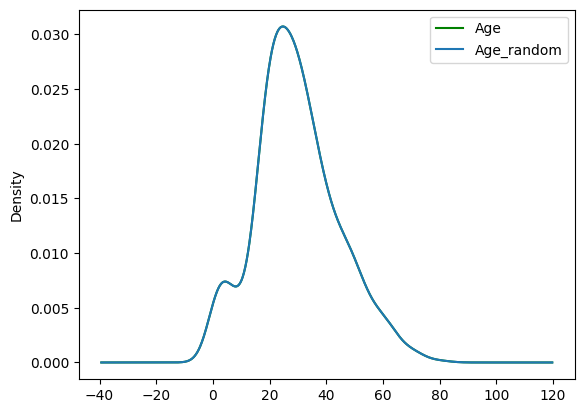

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='green')
df.Age_random.plot(kind='kde',ax=ax)
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best')


##capturing nan values with a new feature
#### it work well with the data that are not completely missing at random

In [ ]:
df=pd.read_csv(url,usecols=['Age','Fare','Survived'])

In [ ]:
#creating new feature to capture the nan values
df['Age_Nan']=np.where(df['Age'].isnull(),1,0)# if there is value return 0 else return 1

In [ ]:
df.head()

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


## end of distribution imputation
### missing not completely at random

In [ ]:
extreme=df.Age.mean()+3*df.Age.std()#return the numbers after 3rd std

In [ ]:
def impute_nan(df,variable,median,extreme):
  df[variable+'_end_distri']=df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [ ]:
df.head()

,Survived,Age,Fare,Age_Nan,Age_end_distri
0,0,22.0,7.2500,0,22.0
1,1,38.0,71.2833,0,38.0
2,1,26.0,7.9250,0,26.0
3,1,35.0,53.1000,0,35.0
4,0,35.0,8.0500,0,35.0


<Axes: >

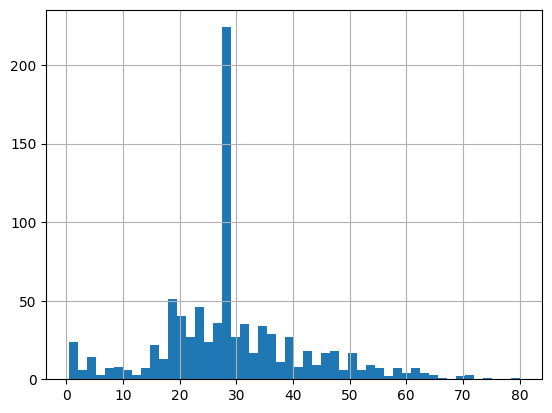

In [ ]:
df['Age'].hist(bins=50)

<Axes: >

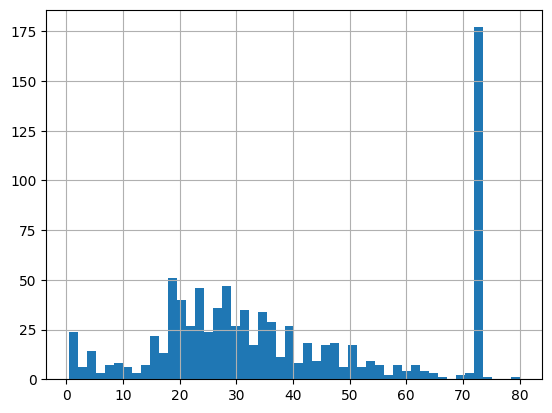

In [ ]:
df['Age_end_distri'].hist(bins=50)

<Axes: xlabel='Age_end_distri'>

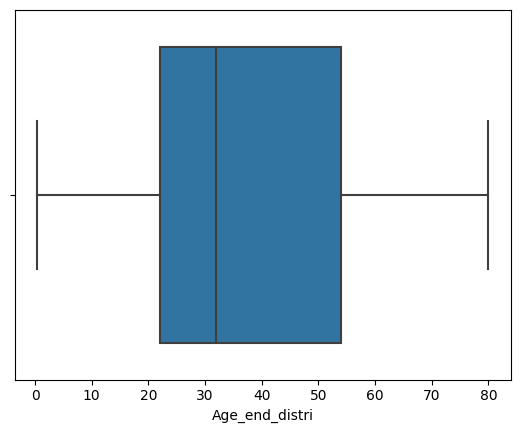

In [ ]:
sns.boxplot(data=df,x='Age_end_distri')

outlier has been captured by this method